<a href="https://colab.research.google.com/github/sachinkun21/Titanic_kaggle/blob/master/Titanic_Disaster_Prediction_Kaggle_ver3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement

### Introduction

In this kernel I will go through the whole process of creating a machine learning model on the famous Titanic dataset, which is used by many people all over the world. It provides information on the fate of passengers on the Titanic, summarized according to economic status (class), sex, age and survival. In this challenge, I will predict whether a passenger on the titanic would have been survived or not.

### About Titanic 

RMS Titanic was a British passenger liner that sank in the North Atlantic Ocean in the early morning hours of 15 April 1912, after it collided with an iceberg during its maiden voyage from Southampton to New York City. There were an estimated 2,224 passengers and crew aboard the ship, and more than 1,500 died, making it one of the deadliest commercial peacetime maritime disasters in modern history. The RMS Titanic was the largest ship afloat at the time it entered service and was the second of three Olympic-class ocean liners operated by the White Star Line. The Titanic was built by the Harland and Wolff shipyard in Belfast. Thomas Andrews, her architect, died in the disaster.

### About the Data Set

We have data of all passengers and the problem statement is to predict the survival  of a passenger given his current data inputs. The complete data can be downloaded here - www.kaggle.com/c/titanic


### Titanic - The sad story
- Exploratory Data Analysis I
- Exploratory Data Analysis II
- This is your last visited course section.Resume Course 
- EDA - Plotting
- Preprocessing
- Preprocessing II
- Feature Engineering
- Modelling
- Advanced Modelling
- Final Model
- Model Evaluation
- Feedback



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Loading Data and Diagnostics
Let's import all required packages. Each package will be explained whenever it is used

In [0]:
# linear algebra
import numpy as np
# data processing
import pandas as pd

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algortithmic packages
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

import os

Let's Load the dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
print(os.listdir("/content/drive/My Drive/titanic"))

['test.csv', 'train.csv', 'gender_submission.csv']


In [5]:
train_df = pd.read_csv('/content/drive/My Drive/titanic/train.csv')
test_df = pd.read_csv('/content/drive/My Drive/titanic/test.csv')

#printing first 5 rows of data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Let's check info of the dataset to get an idea of how it's looking

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


The training set has 891 examples and 11 features along with the Target variable(survived). Datatypes for 2 of the features are floats, 5 are integers and 5 are objects. Below I have listed the features with a short description:

survival:   Survival<br>
PassengerId: Unique Id of a passenger.<br>
pclass:     Ticket class    <br>
sex   :     Sex <br>
Age   :     Age in years    
sibsp :     # of siblings / spouses aboard the Titanic  <br>
parch :     # of parents / children aboard the Titanic  <br>
ticket:     Ticket number   <br>
fare  :     Passenger fare  <br>
cabin :     Cabin number    <br>
embarked:   Port of Embarkation<br>

In [7]:
# let's display the columns names
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Let's take a look at description of numerical Values in Dataset

In [8]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
test_df.iloc[152]

PassengerId                  1044
Pclass                          3
Name           Storey, Mr. Thomas
Sex                          male
Age                          60.5
SibSp                           0
Parch                           0
Ticket                       3701
Fare                          NaN
Cabin                         NaN
Embarked                        S
Name: 152, dtype: object

Above we can see that 38% out of the training-set survived the Titanic. We can also see that the passenger ages range from 0.4 to 80. On top of that we can already detect some features, that contain missing values, like the 'Age' feature. Also we can find outliers if any by visual observation of quartiles.

Let's look at head of the data

In [10]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


From the table above, we can note a few things. First of all, that we need to convert a lot of features into numeric ones later on, so that the machine learning algorithms can process them. Furthermore, we can see that the features have widely different ranges, that we will need to convert into roughly the same scale. We can also spot some more features, that contain missing values (NaN = not a number), that wee need to deal with.

Let's take a more detailed look at what data is actually missing:

In [11]:
# count of null values in each column
count  = train_df.isnull().sum().sort_values(ascending = False)

# percentage of Null Values in each column
percent = train_df.isnull().sum()/train_df.count()*100

# rounding and arranging the percentage
percent = round(percent,2).sort_values(ascending = False)

# concatenating count and percentage into one
missing_data = pd.concat([count,percent], axis = 1)

# printing top 5 rows
missing_data.head()

,0,1
Cabin,687,336.76
Age,177,24.79
Embarked,2,0.22
Fare,0,0.00
Ticket,0,0.00


If you notice, Cabin has the highest percentage. The Embarked feature has only 2 missing values, which can easily be filled. It will be much more tricky, to deal with the 'Age' feature, which has 177 missing values. The 'Cabin' feature needs further investigation, but it looks like that we might want to drop it from the dataset, since 77 % of it are missing.



### Visualization

To check the relationship between survival vs age/sex, let's plot some graphs

#### 1. Age vs Sex

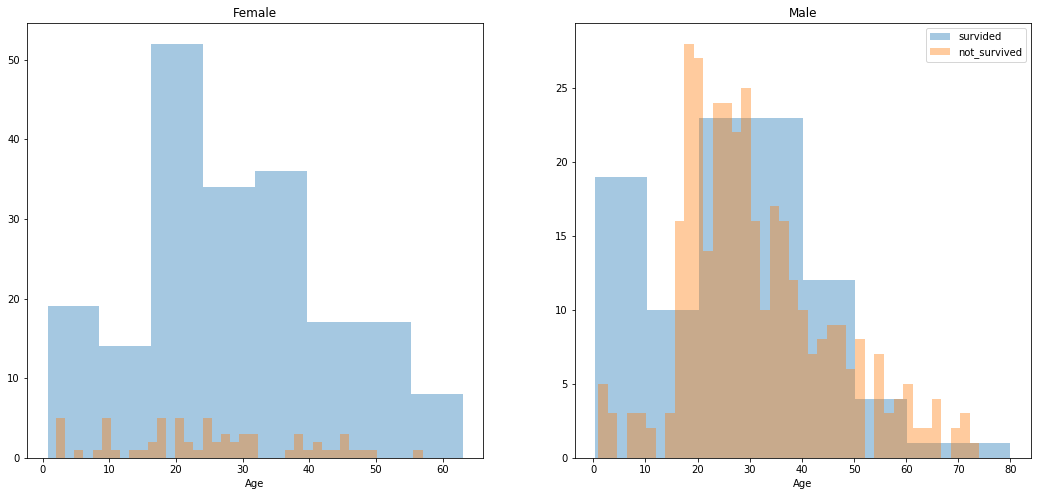

In [12]:
survived = 'survided'
not_survived = 'not_survived'
fig, axes = plt.subplots(nrows = 1 , ncols = 2 , figsize = (18,8))
women = train_df[train_df['Sex'] == 'female']
men = train_df[train_df['Sex'] == 'male']

ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=8, label = survived , ax=axes[0], kde = False)
ax = sns.distplot(women[women['Survived'] == 0].Age.dropna(), bins = 40, label=not_survived, ax = axes[0], kde =False)
ax.set_title('Female')

ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=8, label = survived , ax=axes[1], kde = False)
ax = sns.distplot(men[men['Survived'] == 0].Age.dropna(), bins = 40, label=not_survived, ax = axes[1], kde =False)
_ = ax.set_title('Male')
ax.legend()
plt.show()

You can see that men have a high probability of survival when they are between 18 and 30 years old, which is also a little bit true for women but not fully. For women the survival chances are higher between 14 and 40.

For men the probability of survival is very low between the age of 5 and 18, but that isn't true for women. Another thing to note is that infants also have a little bit higher probability of survival.

Since there seem to be certain ages, which have increased odds of survival and because I want every feature to be roughly on the same scale, I will create age groups later on.

#### 2. Embarked, Pclass and Sex:

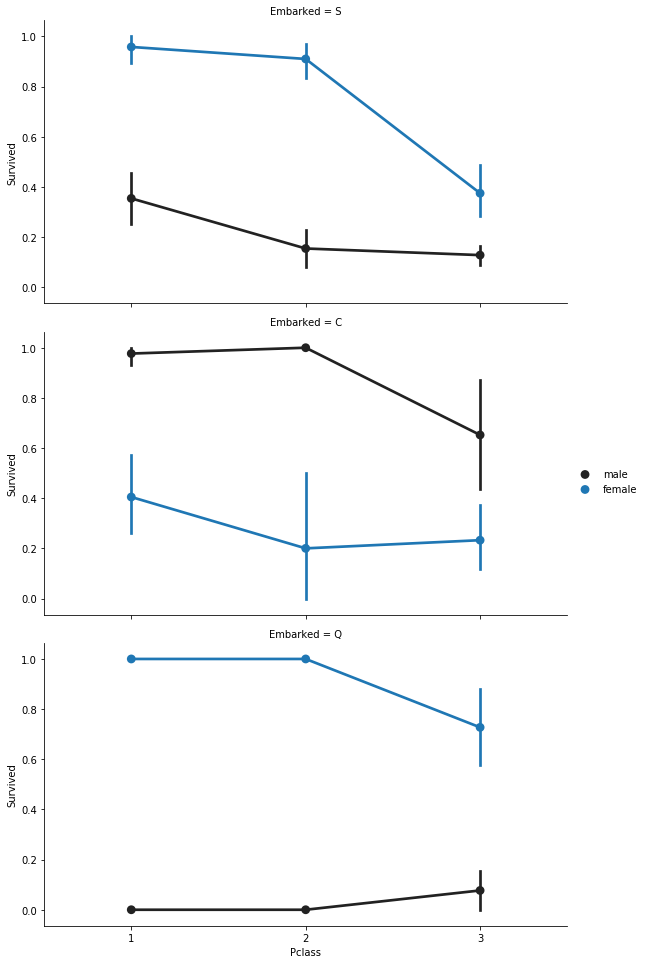

In [13]:
facetgrid = sns.FacetGrid(train_df , row = 'Embarked', height = 4.5 , aspect =1.8)
facetgrid.map(sns.pointplot, 'Pclass','Survived', 'Sex', order=None, hue_order=None)
facetgrid.add_legend()
plt.show()

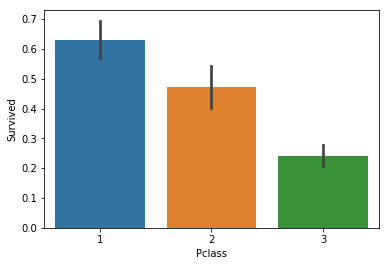

In [14]:
sns.barplot(x = 'Pclass', y = 'Survived' , data = train_df)
plt.show()

Here we see clearly, that Pclass is contributing to a persons chance of survival, especially if this person is in class 1.



#### 3. Let's create another plot below for distribution of P Class:


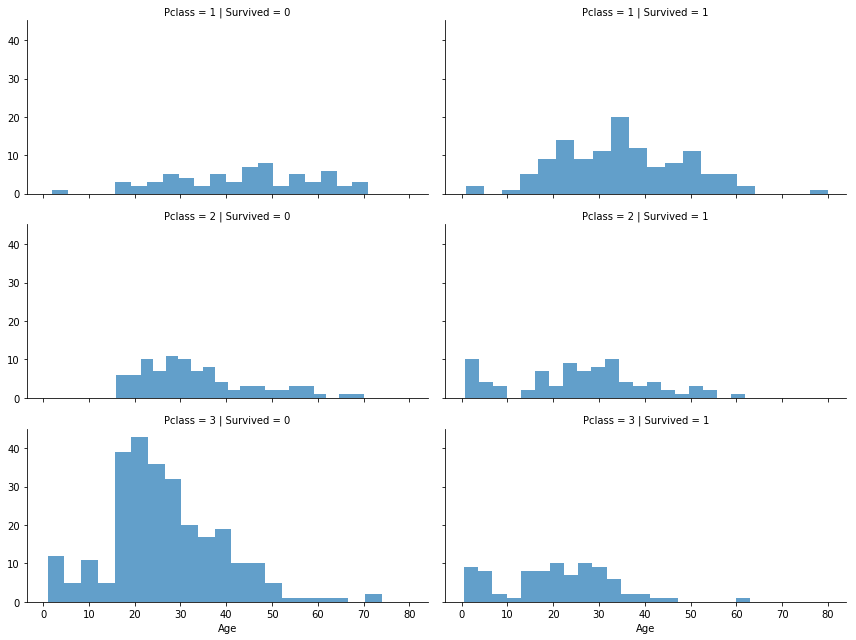

In [15]:
grid = sns.FacetGrid(train_df, row = 'Pclass', col='Survived', hue_order=None, height = 3, aspect=2)
grid.map(plt.hist, 'Age', alpha=0.7, bins = 20)
plt.show()


Assuming, Being alone and survival rate has high dependency. let's Create a new binary feature - 'Alone' 

In [0]:
data = [train_df , test_df]
for dataset in data:
  dataset['Relatives']=dataset['Parch']+dataset['SibSp']
  dataset.loc[dataset['Relatives']>0,'Alone']=0
  dataset.loc[dataset['Relatives']==0,'Alone']=1
  dataset['Alone']=dataset['Alone'].astype(int)

In [17]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Relatives,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1


In [18]:
train_df.Alone.value_counts()

1    537
0    354
Name: Alone, dtype: int64

#### 4. No_of_Relatives vs Survived

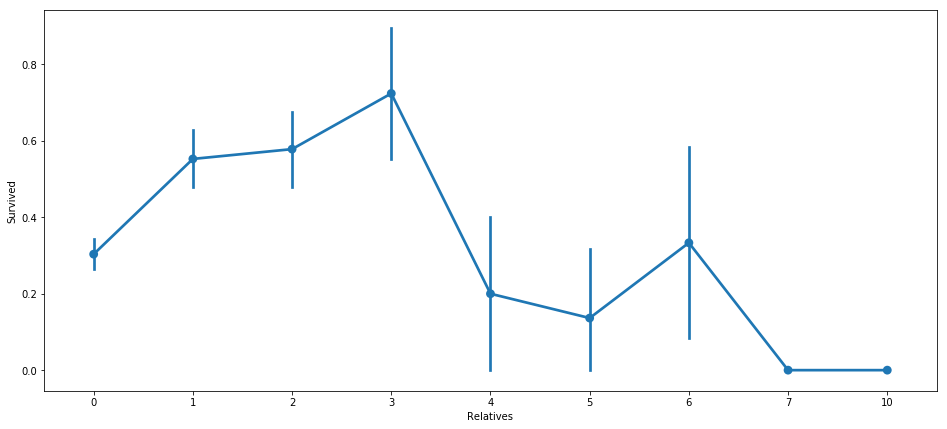

In [19]:
plt.figure(figsize=(16,7))
sns.pointplot(x='Relatives', y = 'Survived', data= train_df )
plt.show()

Very interesting to note that survival rate slowly increases and then falls down

### Basic Pre-Processing

In first step,we will see if any features are irrelevant and drop them. 
As you can see passenger ID is irrelevant.  I will drop 'PassengerId' from the train set, because it does not contribute to a persons survival probability. 

I will not drop it from the test set, since it is required there for the submission

In [20]:
train_df = train_df.drop(['PassengerId'], axis = 1)
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Relatives,Alone
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1


#### Missing Data in cabin :
 As a reminder, we have to deal with Cabin (687), Embarked (2) and Age (177). First I thought of dropping the 'Cabin' variable but then I found something interesting.

`A cabin number looks like ‘C123’ and the letter refers to the deck.`
 
Therefore we’re going to extract these and create a new feature, that contains a persons deck. Afterwords we will convert the feature into a numeric variable. 

The missing values will be converted to zero. In the picture below you can see the actual decks of the titanic, ranging from A to G.

In [0]:
import re

deck =  {'A':1  , 'B': 2 , 'C': 3, 'D':4 ,'E' : 5 , 'F':6 , 'G':7 , 'U':8}
data = [train_df , test_df]
for dataset in data:
  dataset['Cabin']=dataset['Cabin'].fillna('U0')
  dataset['Deck']=dataset['Cabin'].map(lambda x : re.compile("([a-zA-Z]+)").search(x).group())
  dataset['Deck']=dataset['Deck'].map(deck)
  dataset['Deck']=dataset['Deck'].fillna(0)
  dataset['Deck']=dataset['Deck'].astype(int)

In [22]:
train_df.Deck.value_counts()

8    687
3     59
2     47
4     33
5     32
1     15
6     13
7      4
0      1
Name: Deck, dtype: int64

In [23]:
# Same code as above, Regular Expression Simplified

import re

deck =  {'A':1  , 'B': 2 , 'C': 3, 'D':4 ,'E' : 5 , 'F':6 , 'G':7 , 'U':8}
data = [train_df , test_df]

for dataset in data:
  dataset['Cabin']=dataset['Cabin'].fillna('U0')
  dataset['Deck']=dataset['Cabin'].map(lambda x : x[0])
  dataset['Deck']=dataset['Deck'].map(deck)
  dataset['Deck']=dataset['Deck'].fillna(0)
  dataset['Deck']=dataset['Deck'].astype(int)

  
  
train_df.Deck.value_counts()

8    687
3     59
2     47
4     33
5     32
1     15
6     13
7      4
0      1
Name: Deck, dtype: int64

we can now drop the cabin feature now

In [0]:
data = [train_df,test_df]
for dataset in data:
  dataset=dataset.drop(['Cabin'], axis = 1)

In [0]:
train_df=train_df.drop('Cabin', axis = 1)
test_df=test_df.drop('Cabin', axis = 1)

#### Missing data in Age
Now we can tackle the issue with the age features missing values:  

I will create an array of size n that contains random numbers, which are computed based on the mean age value in regards to the standard deviation where n is equal to number of missing Values.

In [0]:
data = [train_df , test_df]
mean = train_df['Age'].mean()
std  = test_df['Age'].std()


for dataset in data:
  count_of_null = dataset['Age'].isnull().sum()
  
  rand_age = np.random.randint(mean-std,mean+std, size = count_of_null)
  
  age_slice = dataset['Age'].copy()
  age_slice[np.isnan(age_slice)]= rand_age
  
  dataset['Age']=age_slice
  dataset['Age']=dataset['Age'].astype(int)

#### Missing data in Embarked:
Since the Embarked feature has only 2 missing values, we will just fill these with the most common one.



In [27]:
train_df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [0]:
train_df['Embarked'] = train_df['Embarked'].fillna('S')
test_df['Embarked'] = test_df['Embarked'].fillna('S')

All the missing values in our dataset has been dealt.
Let's check info of train_df


In [29]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
Survived     891 non-null int64
Pclass       891 non-null int64
Name         891 non-null object
Sex          891 non-null object
Age          891 non-null int64
SibSp        891 non-null int64
Parch        891 non-null int64
Ticket       891 non-null object
Fare         891 non-null float64
Embarked     891 non-null object
Relatives    891 non-null int64
Alone        891 non-null int64
Deck         891 non-null int64
dtypes: float64(1), int64(8), object(4)
memory usage: 90.6+ KB


In [30]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null int64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Embarked       418 non-null object
Relatives      418 non-null int64
Alone          418 non-null int64
Deck           418 non-null int64
dtypes: float64(1), int64(8), object(4)
memory usage: 42.5+ KB


#### Name: 
We will use the Name feature to extract the Titles from the Name, so that we can build a new feature out of that.

In [31]:
train_df.Name.head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [0]:
data = [train_df,test_df]

for dataset in data:
  dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.', expand = False)

In [33]:
train_df.Title.value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Countess      1
Ms            1
Lady          1
Don           1
Jonkheer      1
Sir           1
Capt          1
Mme           1
Name: Title, dtype: int64

In [0]:
data = [train_df,test_df]

for dataset in data:
  dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don','Dr',\
                                              'Major','Rev','Sir','Jonkheer','Dona'], 'Rare')
  dataset['Title'] = dataset['Title'].replace('Mlle' , 'Miss')
  dataset['Title'] = dataset['Title'].replace('Ms' , 'Miss')
  dataset['Title'] = dataset['Title'].replace('Mme' , 'Mrs')
  

In [0]:
titles={'Mr':1,'Miss':2,'Mrs':3, 'Master':4, 'Rare':5}

for dataset in data:
  dataset['Title']=dataset['Title'].map(titles)

In [36]:
print(train_df.Title.isna().sum())
print(test_df.Title.isna().sum())

0
0


Even the name has some meaning. We cannot afford miss information

Dropping name and

In [0]:
train_df = train_df.drop(['Name'], axis = 1)
test_df = test_df.drop(['Name'], axis = 1)

In [38]:
train_df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

Sex is categorical but we have to convert 'Sex' feature into numeric.

In [0]:
gender = {'male':0 , 'female':1}
data = [train_df,test_df]

for dataset in data:
  dataset['Sex']=dataset['Sex'].map(gender)

#### Ticket & Fare

In [40]:
train_df.Ticket.head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

Since the Ticket attribute has 681 unique tickets, it will be a bit tricky to convert them into useful information. So we will drop it from the dataset.

In [0]:
data = [train_df,test_df]
for dataset in data:
  dataset=dataset.drop('Ticket', axis = 1)

In [0]:
train_df=train_df.drop('Ticket', axis = 1)
test_df=test_df.drop('Ticket', axis = 1)

#### Embarked
Let's convert Embark into a numerical Feature

In [0]:
ports = {'S':0,'C':1, 'Q':2}
data = [train_df,test_df]

for dataset in data:
  dataset['Embarked']=dataset['Embarked'].map(ports)

#### Feature Engineering


We will now create categories within the following features:

Age:
Now we need to convert the 'age' feature. First we will convert it from float into integer. Then we will create the new 'AgeGroup" variable, by categorizing every age into a group. Note that it is important to place attention on how you form these groups, since you don't want for example that 80% of your data falls into group 1.

In [0]:
data = [train_df,test_df]
for dataset in data:
  dataset['Age']=dataset['Age'].astype(int)
  dataset.loc[dataset['Age']<=11, 'Age']=0
  dataset.loc[(dataset['Age']>11) & (dataset['Age']<=18), 'Age']=1
  dataset.loc[(dataset['Age']>18) & (dataset['Age']<=22), 'Age']=2
  dataset.loc[(dataset['Age']>22) & (dataset['Age']<=27), 'Age']=3
  dataset.loc[(dataset['Age']>27) & (dataset['Age']<=33), 'Age']=4
  dataset.loc[(dataset['Age']>33) & (dataset['Age']<=40), 'Age']=5
  dataset.loc[(dataset['Age']>40) & (dataset['Age']<=66), 'Age']=6
  dataset.loc[(dataset['Age']>66), 'Age']=6

The above grouping can also be achieved in single line with Pd.Cut. You can give a try.

Now Let's see the Groups.

In [45]:
train_df.Age.value_counts()

4    164
6    157
3    150
5    145
2    116
1     91
0     68
Name: Age, dtype: int64

Similarly for the fare , we do same approach, For the 'Fare' feature, we need to do the same as with the 'Age' feature. But it isn't that easy, because if we cut the range of the fare values into a few equally big categories, 80% of the values would fall into the first category. Fortunately, we can use sklearn "qcut()" function, that we can use to see, how we can form the categories.

Current dataframe looks as follows


In [46]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Relatives,Alone,Deck,Title
0,0,3,0,2,1,0,7.2500,0,1,0,8,1
1,1,1,1,5,1,0,71.2833,1,1,0,3,3
2,1,3,1,3,0,0,7.9250,0,0,1,8,2
3,1,1,1,5,1,0,53.1000,0,1,0,3,3
4,0,3,0,5,0,0,8.0500,0,0,1,8,1


Let's Perform Fare binning Now:


In [47]:
data = [train_df,test_df]

for dataset in data:
  dataset.loc[dataset['Fare']<=7.91, 'Fare']=0
  dataset.loc[(dataset['Fare']>7.91) & (dataset['Fare']<=14.454), 'Fare']=1
  dataset.loc[(dataset['Fare']>14.454) & (dataset['Fare']<=31), 'Fare']=2
  dataset.loc[(dataset['Fare']>31) & (dataset['Fare']<=99), 'Fare']=3
  dataset.loc[(dataset['Fare']>99) & (dataset['Fare']<=250), 'Fare']=4
  dataset.loc[(dataset['Fare']>250) , 'Fare']=5
  dataset['Fare']=dataset['Fare'].fillna(0)
  dataset['Fare']=dataset['Fare'].astype(int)

train_df.Fare.value_counts()

2    229
0    223
1    217
3    169
4     44
5      9
Name: Fare, dtype: int64

In [0]:
# test_df[test_df.Fare.isna()==True]

Let's Create a new Feature A combination of Age and Class

In [49]:
data = [train_df, test_df]


for dataset in data:
  dataset['age_class'] = dataset['Age']*dataset['Pclass']
  
  
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Relatives,Alone,Deck,Title,age_class
0,0,3,0,2,1,0,0,0,1,0,8,1,6
1,1,1,1,5,1,0,3,1,1,0,3,3,5
2,1,3,1,3,0,0,1,0,0,1,8,2,9
3,1,1,1,5,1,0,3,0,1,0,3,3,5
4,0,3,0,5,0,0,1,0,0,1,8,1,15


In [0]:
# train_df.head()

## Modeling

Let's divide our data into Feature or Preictor Variables i.e X and Label or Predicted variable i.e y

In [0]:
X_train = train_df.drop('Survived', axis = 1)
y_train = train_df['Survived']

X_test = test_df.drop('PassengerId' ,  axis = 1)

Now let's train our first Model: A Stochastic Gradient Descent Classifier

In [52]:
# creating model object
sgd = linear_model.SGDClassifier(max_iter = 5, tol = None)

# Fitting model on Data
sgd.fit(X_train,y_train)

#using model to predict
y_pred = sgd.predict(X_test)

# Storing prediction accuracy
acc_sgd = round(sgd.score(X_train,y_train)*100,2)
print(acc_sgd)

77.22


Great 78.23 % accuracy with our first Model.

Now Let's try the classical Logistic Regression Model

In [53]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)


acc_log=round(logreg.score(X_train,y_train)*100,2)
print(acc_log)

81.59


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


I am going to write a loop which will fit and predict accuracy for different classes of models

and return a dataframe with respective accuracies

In [0]:
dict_model = {'sgd':linear_model.SGDClassifier(max_iter = 5, tol = None), 
             'log_reg':LogisticRegression(),
             'decision_tree':DecisionTreeClassifier(),
             'random_forest':RandomForestClassifier(n_estimators = 100),
             'knn_classifier': KNeighborsClassifier(n_neighbors= 3),
             'gaussian':GaussianNB(),
             'perceptron':Perceptron(max_iter=5),
             'linear_svc':LinearSVC()
             }

In [55]:
dict_accuracies={}

for name,classifier in dict_model.items():
  dict_model[name].fit(X_train,y_train)
  score = dict_model[name].score(X_train,y_train)
  dict_accuracies[name]=round(score*100,2)
  


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [63]:
result_df=pd.DataFrame.from_dict(dict_accuracies,orient = 'index',columns = ['Score'])
result_df= result_df.sort_values(by = 'Score', ascending = False)
result_df

,Score
decision_tree,92.70
random_forest,92.70
knn_classifier,84.62
log_reg,81.59
linear_svc,81.03
perceptron,78.90
gaussian,78.56
sgd,67.90


### Cross Validation Evaluation

### Evaluation Metrics

### Hyper Parameter Tuning